<IPython.core.display.Javascript object>


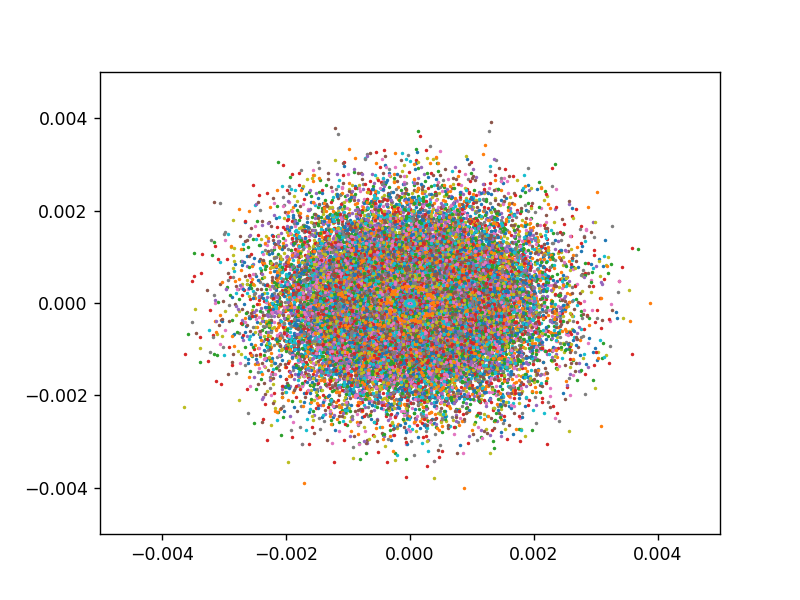

In [25]:
from map2D import map2D
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import animation
from IPython.display import HTML
%matplotlib notebook

resonance=1.0/4.0
dvx=0.0030
dvy=0.0030
#resonance=1.0/4.0
#dvx=0.0001
#dvy=0.0001

#resonance=1.0/5.0
#dvx=0.0001
#dvy=-0.0001


pxs=np.concatenate([0.0001*np.arange(100), np.array([],dtype=np.float64)])
pxps=np.zeros_like(pxs)
particles=np.vstack([pxs,pxps])
#xpx=map2D(npart=10, twiss=[1,0], twiss_beam=[1,0],tune=resonance+dvx, chrom=0.0, espr=0.0, particles=particles)

xpx=map2D(npart=3000, emit=1e-6, twiss=[1.0,0.0],twiss_beam=[1,0],tune=0.1025, chrom=0.0, espr=0.0)
ypy=map2D(npart=3000, emit=1e-6, twiss=[1.0,0.0],twiss_beam=[1,0],tune=0.1975, chrom=0.0, espr=0.0)


pys=np.concatenate([0.0001*np.arange(100), np.array([],dtype=np.float64)])
pyps=np.zeros_like(pys)
particles=np.vstack([pys,pyps])
#ypy=map2D(npart=len(pxs), twiss=[1,0], twiss_beam=[1,0],tune=resonance+dvy, chrom=0.0, espr=0.0,particles=particles, 
#          emit=0.1e-6)

#avex,avep,sizex,sizep,emit=xpx.statistics()
emitlistx=[]
sizelistx=[]
avelistx=[]

emitlisty=[]
sizelisty=[]
avelisty=[]

N_turn=200


def evolve_func(turns, kick_turn_start=0, B2=0,B2S=80,
               ):
    for i in range(turns):
        if i>=kick_turn_start:
            xpx.coor2D[1,:]-=B2 *(xpx.coor2D[0,:]*xpx.coor2D[0,:]-ypy.coor2D[0,:]*ypy.coor2D[0,:])/2.0 - B2S*ypy.coor2D[0,:]*xpx.coor2D[0,:]
            ypy.coor2D[1,:]+=B2S*(xpx.coor2D[0,:]*xpx.coor2D[0,:]-ypy.coor2D[0,:]*ypy.coor2D[0,:])/2.0 + B2 *ypy.coor2D[0,:]*xpx.coor2D[0,:]
        
        xpx.propagate()
        ypy.propagate()
        
        avex,avepx,sizex,sizepx,emitx=xpx.statistics()
        avey,avepy,sizey,sizepx,emity=ypy.statistics()
        #avelist.append(avex)
        #sizelist.append(sizex)
        emitlistx.append(emitx)
        emitlisty.append(emity)        
        yield xpx.coor2D
        #yield ypy.coor2D
        
evolve=evolve_func(N_turn+2)
    
fig,ax=plt.subplots()
ax.set_xlim([-0.005,0.005])
ax.set_ylim([-0.005,0.005])
xlist=[]
xplist=[]



for i in range(N_turn):
    arr=next(evolve)
    #if np.max(arr)>1: break
    xlist.append(arr[0])
    xplist.append(arr[1])
xarr=np.vstack(xlist)
xparr=np.vstack(xplist)
ax.plot(xarr[0:10],xparr[0:10],linestyle='None', marker='.', markersize=2)
#ax.set_xticks([])
#ax.set_yticks([])
Jx=xarr*xarr+xparr*xparr
#fig.savefig("test.png",dpi=300,transparent=True)

<IPython.core.display.Javascript object>


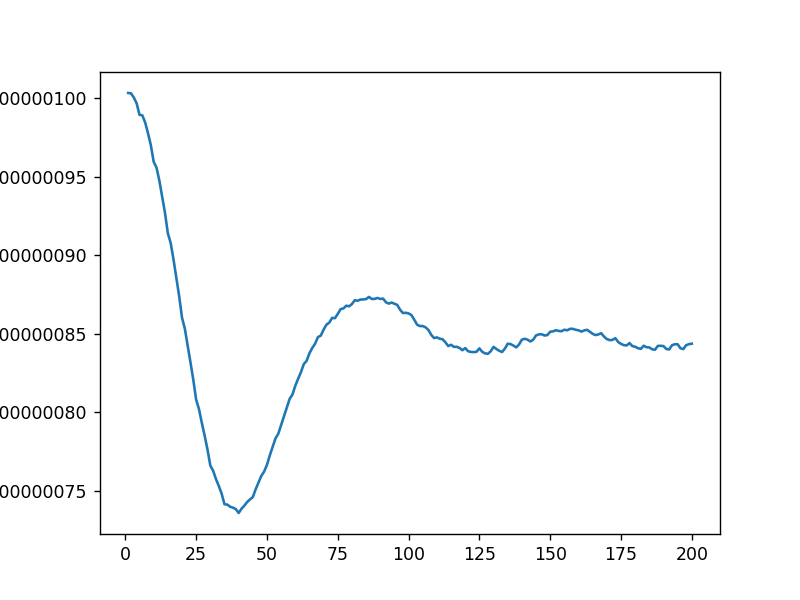

In [26]:
turns=np.linspace(1, N_turn, num=N_turn)
fig,ax=plt.subplots()
#ax.plot(turns,emitlistx,turns,emitlisty)
ax.plot(turns,emitlisty)

In [ ]:
fig,ax=plt.subplots()
ax.set_xlim([10000,15000])
for i in range(8):
    ax.plot(Jx[:,i+1])


<IPython.core.display.Javascript object>


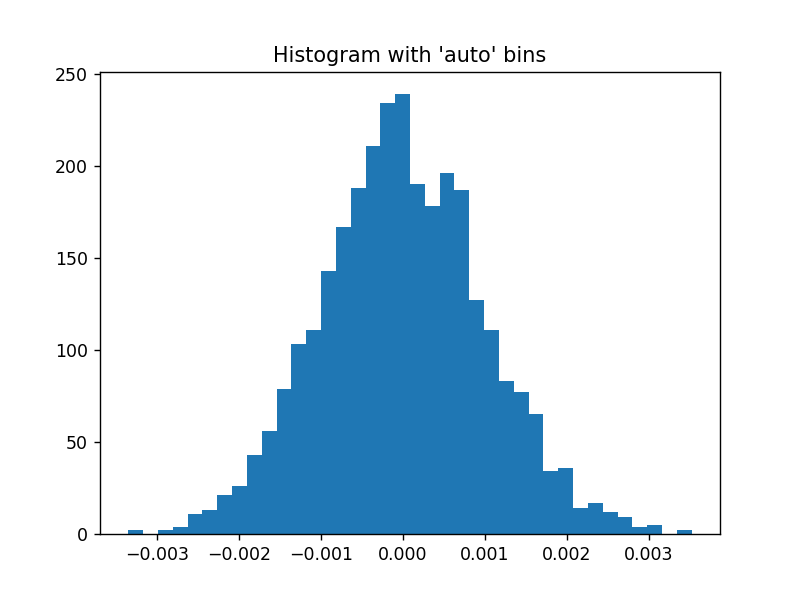

In [27]:
fig,ax=plt.subplots()
plt.hist(xarr[0,0:3000], bins='auto')  # arguments are passed to np.histogram
plt.title("Histogram with 'auto' bins")
#Text(0.5, 1.0, "Histogram with 'auto' bins")
plt.show()

In [12]:
xarr[0,0:10]

array([ 1.92452954e-04,  5.19780097e-05, -7.01338526e-04,  3.96516547e-04,
       -2.39741781e-05, -6.16584898e-04, -1.63299623e-03, -7.92473509e-04,
        1.10401953e-04, -4.34147952e-04])